# Microsoft Studios Pitch
Danielle Rossman
email: danielle.m.rossman@gmail.com

## Business Problem: 
Microsoft intends to add a movie studio division to its business portfolio. In doing so it needs insights into how it can maximize profit and minimize cost within this new division of its rather large company.

## Stakeholders: 
a) C-suite employees (e.g., CEO, CFO, etc.) who will need to ensure profitability and lack of drain on the companies overall resources.

b) Potential new employees, especially those who will run this new division. Because it takes exceptional organizational skills and industry knowledge to run a movie studio, Microsoft will need to vie for that talent. Showing that they have researched the business problem and received valuable insights, will help lure in those most qualified to launch this new studio. Demonstrating that the company has taken the effort to attain these insights also shows qualified candidates that they can rely upon C-suite employees to provide necessary resources (e.g., money, physical resources, physical space and further talent.) In other words C-suite will be demonstrating their willingness to support this new division by taking the initiative to gather preliminary insights.

c) Potential writers, directors, cinematographers, etc. who will want to know that they if they sign on for individual or prolonged contracts, that there work, talent and time won't be wasted by a studio that is ill-equipped to produce what they are working on.
    
## Conclusions:
Month vs. ROI:

As seen in the below graph, movies released in June have an extremely high Return on Investment (ROI) that nearly doubles its closest competing month, which is May. As such, I would highly recommend June release dates to the stakeholders at Microsoft. The poorest performing month, by far, is March, with less than one sixth the mean ROI of June. Thus, I would advise against releasing movies in March. There are several intermediate months, in terms of mean ROI, consisting of January, April, July, September, October and November. The mean ROI of these "intermediate months" hovers roughly between 200 and 250. While these appear to be simply "intermediate" ROI months, they aren't too shabby in terms of ROI, and still remain viable options for profitable release months.
In summary, I would "very highly recommend" June releases, and "advise highly against" March releases. I would also advise May, November, July, September, January and October releases (in that order). While the mean ROI's of October and December aren't nearly as dismal as that of may, I would still advise Microsoft to shy away from these months and choose the more optimal release months listed above.

Runtime vs. ROI:

Initially, I attempted to cull the highest ROI outliers in order to tease out a visualization that could give insight. As I continued to cull the highest ROI outliers, and failed to create a meaningful visual, it occurred to me that I could (and should) instead stratify, by culling out all BUT the outliers (and a few more) to see what that visualization demonstrated about the top-earning/blockbuster films.
I then began to see a weak negative correlation between runtime and ROI. Perhaps more importantly, I saw
that the top-earners/blockbusters (my definition here is ROI > 1000), sat within a band of roughly 75 to 135 min
of runtime. (1hr15min to 2hr15min)
I would thus recommend to Microsoft that their new production studio aim to produce films within roughly this range (1hr15min to 2hr15min). A secondary recommendation here is that focusing on attaining highly skilled/talented film editors is of significant importance, as they can help to maintain an appropriate plot arc,while also appeasing the audiences limited attention span.

Genre vs. ROI:

Of importance here is how many of these movies were inappropriately assigned a genre or far too many genres. This presents a problem in the data and to my surprise with IMDB's genre assignments, in my humble opinion. Once I researched the top 25 films, it became clear that almost all of the multi-genred films should simply be assigned  the genre of "Horror." While this may seem to overstep some bounds, I disagree. Most of the time, when a script is presented for purchase the reader is not thinking about 2-4 genres it fits, when it's clearly about violence and horror. The same concept applies to the audience. I would also argue that when someone wants to see a horror movie, they care little about any secondary or tertiary romantic plotline, especially when the romantic partners end up murdered at some point within the plot. In short, and rather simplistically, audiences choose horror flocks for the...HORROR. They want the fear-based adrenaline that only a true horror pic can produce. I thus reassigned some of these genre labels in order to better advise Microsoft Studios and  eliminate confusing, convoluted genre assignments.
After reassigning inappropriate genre labels, I found that 18 of the top 25 earning films (based on ROI) since 2010 were Horror films. 2 of the top earners were Dramas. Of the remaining 6 films, there was one each of the following (mixed) genres: 'Drama,Romance', 'Action,Biography,Drama', 'Drama,Fantasy,Romance', 'Comedy,Drama', and 'Drama,Thriller.' Noticeably, the common denominator to all of these is...DRAMA. I would thus recommend to Microsoft studios that they focus heavily on acquiring spripts for Horrors and Dramas.
I would also advise them to be wary of overly complex genre assignments, as these assignments (at least within the top 25 earners of this data set, were often innappropriate and misleading. This could heavily affect script acquisition.

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

## Data Imports

In [2]:
! ls

CONTRIBUTING.md  ROI_min_1.png    ROI_month.png    student.ipynb
LICENSE.md       ROI_min_2.png    ROI_mos.png      zippedData
README.md        ROI_min_3.png    Untitled.ipynb
ROI_by_month.png ROI_min_4.png    awesome.gif


In [3]:
!ls zippedData

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


## Data Sources:

The two csv's in the cell below were gathered from data from https://www.imdb.com and https://www.the-numbers.com, respectively. IMDB stands for internet movie database and overlaps nicely with The Numbers website. That is demonstrated by the keys of the two csv's below. The first csv provides relevent genre data and the 2nd csv provides relevent financial data. Both csv's provide info on release dates. 

By merging the two datasets, I was able to compare these four important areas of interest:
1) Return on Investment ('ROI')
2) 'Release Month' 
3) Movie length ('runtime_minutes')
4) Genre ('genres')
By pivoting the latter three factors against the first factor (ROI), I was able to generate the insights demonstrated below and described above (see Conclusions).

Relevance of the four areas of interest:
By comparing release month, movie length and genre with ROI, I look to find the optimal release months, movie lengths and genres to maximize ROI. In finding these optimal recommendations, I can advise Microsoft on which types (genres) and lengths of movies to make and when to release them, in order to maximize ROI/profit. (Of note, movie length can of course be tweaked post-filming via editing and release month has some "play" to it as well. Genre is the only area of interest that must be decided upon in advance of production (i.e., at the time of buying a script).

Limitations of data:

There is an extremely high number of unique genres within the IMDB dataset, as well as sometimes innacurate genre labeling which required investigation of individual movies to understand their content and reassign their genre.

In [4]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#I imported and explored each of the csv's/tsv's in zippedData.
#I have simply removed that code to simplify my notebook and make it easier on the eye.
#These were the two csv's I found useful and retained here.

In [5]:
print(imdb_title_basics.keys())
print(tn_movie_budgets.keys())

#As described above, I chose these two csv's because of the relevent keys printed below.

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [6]:
print(imdb_title_basics.shape)
print(tn_movie_budgets.shape)

#As can be seen the the IMDB dataframe has 146,000 rows and 6 columns, whereas 
#The Numbers dataframe has 1,920 rows and 10 columns. Each row corresponds to a different movie,
#although this rwo count may reduce after cleaning the data to remove duplicates.

(146144, 6)
(5782, 6)


In [7]:
#I will present the descriptive statictics for both 'ROI' and 'Release Month' below after
#I manipulate the data to generate those two columns/features

In [8]:
imdb_title_basics['runtime_minutes'].describe()

#Notice the interquartile range of 70-99 and the extremely high max runtime, 
#indicating at least one outlier. Also, this is obviously a numerical variable as opposed
#to the one explored directly below, which is categorical.

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [9]:
imdb_title_basics['genres'].describe()

#Genres is a categorical variable with over 1,085 unique genres within this dataset.
#That is one problematic aspect of this dataset and will be dealt with below by consolidation
#of 'genres' listed as a mixture of individual genres. The most common genre is Documentary, 
#which has a frequency of 32,185.

count          140736
unique           1085
top       Documentary
freq            32185
Name: genres, dtype: object

## Data Preparation:
(I will do some of my data cleaning while preparing my third visualation, as it is labor intensive and requires me
to scan the dataframe and hard code some changes, due to poor labelling of genres. I will explain more below.)

In [10]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

#I removed dollar signs and converted the above three column types to int in order to
#use these colmns for the ROI calculation in the cell below.

In [11]:
tn_movie_budgets['ROI'] = ((tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget'])*100
tn_movie_budgets = tn_movie_budgets.sort_values('ROI', ascending = False)

#I have calculated ROI (and created its complementary column) and sorted the entire dataframe according to ROI 
#in a descending fashion.

In [12]:
tn_movie_budgets['Release Year'] = tn_movie_budgets['release_date'].str[-4:]
tn_movie_budgets['Release Year'] = tn_movie_budgets['Release Year'].astype(int)
tn_movie_budgets['Release Month'] = tn_movie_budgets['release_date'].str[:3]

tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['Release Year'] > 2009]

#I have created a second new column within this data frame ('Release Year') by selecting out the last four characters 
#of the 'release date' and converting its type to int. I then culled the dataframe below to include only those 
#movies released after 2009. I have also created a third new column ('Release Month') by selecting out only the 
#first three characters of the 'release date.' That column will consist of a categorical variable and can thus
#remain a string.


tn_movie_budgets.head() #sanity check

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,Release Year,Release Month
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,2015,Jul
5211,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10075.949000,2012,Jan
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,6558.059067,2011,Apr
5213,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,6336.419800,2015,Apr
4664,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5817.067733,2010,Oct


In [13]:
imdb_title_basics.rename(columns={"primary_title":"movie"}, inplace = True)
#I renamed 'primary title' as simply 'movie' to prepare the IMDB dataframe to be merged with The Numbers dataframe,
# on the column now named 'movie' in both dataframes.

tn_imdb_merge = tn_movie_budgets.merge(imdb_title_basics, how='inner', on='movie')
#I have merged the two dataframes via an inner merge (to ensure that no cells have nulls).

print("Merged dataframe shape:")
print(tn_imdb_merge.shape)
#The shape of this new merged dataframe is  2,352 rows by 14 columns. As one can see, a significant number of rows
#(movies) have been culled by the inner merge. 

print("Unique Genres of merged dataframe:")
print(tn_imdb_merge['genres'].nunique())
#As can also be seen, the number of unique genres has also been quite significantly reduced, (by roughly 800).

unique_genres = list(tn_imdb_merge['genres'].value_counts().index)
#created for potential later use

tn_imdb_merge = tn_imdb_merge.drop_duplicates(subset='movie')
print("Merged dataframe shape after dropping of any duplicates:")
print(tn_imdb_merge.shape)
print("Unique genres of merged dataframe after dropping of any duplicates:")
print(tn_imdb_merge['genres'].nunique())
#As can be seen dropping of duplicates culled the merged dataframe even further of several hundred rows (movies) 
#and thus 53 unique genres.

Merged dataframe shape:
(2604, 14)
Unique Genres of merged dataframe:
301
Merged dataframe shape after dropping of any duplicates:
(1798, 14)
Unique genres of merged dataframe after dropping of any duplicates:
260


In [14]:
tn_imdb_merge.head() #sanity check

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,Release Year,Release Month,tconst,original_title,start_year,runtime_minutes,genres
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,2015,Jul,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller"
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10075.949000,2012,Jan,tt1560985,The Devil Inside,2012,83.0,Horror
2,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,6558.059067,2011,Apr,tt1591095,Insidious,2010,103.0,"Horror,Mystery,Thriller"
3,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,6336.419800,2015,Apr,tt3713166,Unfriended,2014,83.0,"Horror,Mystery,Thriller"
4,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5817.067733,2010,Oct,tt1536044,Paranormal Activity 2,2010,91.0,Horror


In [15]:
tn_imdb_merge['ROI'].describe()
#Now that I have calculated the ROI and created a corresponding column, I can view itss descriptive statistics.
#This is a continuous/numerical variable and has an interquartile range of -73.544308 to 274.119350.
#That the lower end of the interquartile range is negative deserves notice in that it indicated that a significant
#number of films lose value (i.e., they cost more to make than they reap in profits).
#Nonetheless, the mean ROI is quite high (239.022785), indicating that the revenue was more than twice (2.39 times)
#the production cost. 
#Thus relatively high mean, but negative 25th percentile indicates a heavily right/positive-skewed disribution.
#The extremely high max also hints at this and certainly indicates some outliers.

count     1798.000000
mean       236.674994
std       1135.637760
min       -100.000000
25%        -71.100244
50%         71.307498
75%        263.051658
max      41556.474000
Name: ROI, dtype: float64

In [16]:
tn_imdb_merge['Release Month'].describe()
#Unsurprisingly, there are 12 unique release months. The month in which movies are most frequently released is
#December, with a frequency of 186. This is obviously a categorical variable.

count     1798
unique      12
top        Dec
freq       211
Name: Release Month, dtype: object

## Data Analysis:

## Finding 1:
Release Month vs. ROI:

As seen in the below graph, movies released in June have an extremely high Return on Investment (ROI) that nearly doubles its closest competing month, which is May. As such, I would highly recommend June release dates to the stakeholders at Microsoft. The poorest performing month, by far, is March, with less than one sixth the mean ROI of June. Thus, I would advise against releasing movies in March.
There are several intermediate months, in terms of mean ROI, consisting of January, April, July, September, October and November. The mean ROI of these "intermediate months" hovers roughly between 200 and 250. While these appear to be simply "intermediate" ROI months, they aren't too shabby in terms of ROI, and still remain viable options for profitable release months.

## Recommendation 1:

In summary, I would "very highly recommend" June releases, and "advise highly against" March releases. I would also advise May, November, July, September, January and October releases (in that order). While the mean ROI's of October and December aren't nearly as dismal as that of may, I would still advise Microsoft to shy away from these months and choose the more optimal release months listed above.

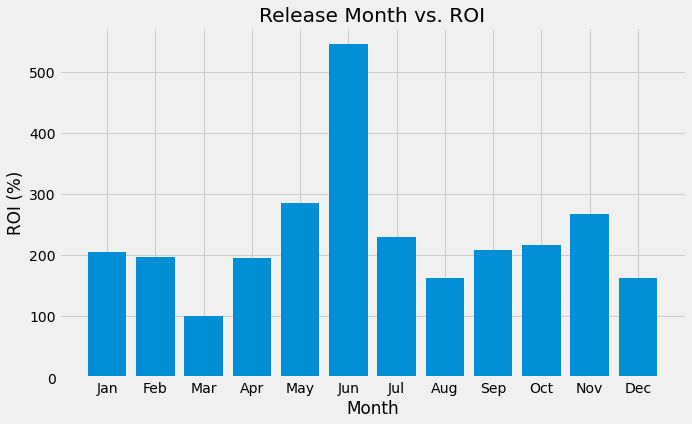

In [17]:
ROI_mean_month = tn_movie_budgets.groupby('Release Month', as_index=False)['ROI'].mean()
#I have grouped by release month and found the mean of that group, assigning it to a variable.

months = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

#I have created a second variable consisting of month abbreviations in string format.


fig, ax = plt.subplots(figsize = (10,6))
ax.bar(x = months, height = ROI_mean_month['ROI'])
#I have used the above variables as my x and y in the below visualized bar graph.

ax.set_title('Release Month vs. ROI')
plt.xlabel('Month')
plt.ylabel('ROI (%)')
#proper labelling

plt.savefig('ROI_mos.png')

#As seen in the below graph, movies released in June have a man Return on Investment (ROI) that nearly doubles 
#its closest competing month, which is May. As such, I would highly recommend June release dates to the stakeholders 
#at Microsoft. The poorest performing month, by far, is March, with less than one sixth the mean ROI of June.
#Thus, I would advise against releasing movies in March.
#There are several intermediate months, in terms of mean ROI, consisting of January, April, July, September, 
#October and November. The mean ROI of these "intermediate months" hovers roughly between 200 and 250. 
#While these appear to be simply "intermediate" ROI months, they aren't too shabby in terms of ROI, and still remain
#viable options for profitable release months.
#In summary, I would "very highly recommend" June releases, and "advise highly against" March releases.
#I would also advise May, November, July, September, January and October releases (in that order).
#While the mean ROI's of October and December aren't nearly as dismal as that of may, I would still advise Microsoft
#to shy away from these months and choose the more optimal release months listed above.

In [18]:
#fig, ax = plt.subplots()
#ax = sns.scatterplot(x = tn_imdb_double_merge['averagerating'], y = tn_imdb_double_merge["profit_worldwide/production_budget"])

In [19]:
#fig, ax = plt.subplots()
#ax = sns.scatterplot(x = tn_imdb_double_merge['averagerating'], y = tn_imdb_double_merge['numvotes'])

In [20]:
#fig, ax = plt.subplots()
#ax = sns.scatterplot(x = tn_imdb_double_merge['numvotes'], y = tn_imdb_double_merge['profit_worldwide/production_budget'])

In [21]:
#fig, ax = plt.subplots()
#ax = sns.scatterplot(x = tn_imdb_double_merge['averagerating'], y = tn_imdb_double_merge["numvotes"])

In [22]:
#fig, ax = plt.subplots()
#ROI_list = list(tn_imdb_double_merge['ROI'])
#tn_imdb_double_merge.hist(column=['ROI'])
#ax.hist(ROI_list, bins=300)
#ax.hist(tn_imdb_merge[tn_imdb_merge['runtime_minutes'] < 150]['runtime_minutes'], bins = 50)

## Finding 2:
    Runtime vs. ROI:
Initially, I attempted to cull the highest ROI outliers in order to tease out a visualization that could give insight. As I continued to cull the highest ROI outliers, and failed to create a meaningful visual, it occurred to me that I could (and should) instead stratify, by culling out all BUT the outliers (and a few more) to see what that visualization demonstrated about the top-earning/blockbuster films.
I can began to see a weak negative correlation between runtime and ROI. Perhaps more importantly, I can saw
that the top-earners/blockbusters (my definition here is ROI > 1000), sat within a band of roughly 75 to 135 min
of runtime. (1hr15min to 2hr15min) 

## Recommendation 2:
I would thus recommend to Microsoft that their new production studio aim to produce films within roughly this range (1hr15min to 2hr15min). A secondary recommendation here is that focusing on attaining highly skilled/talented film editors is of significant importance, as they can help to maintain an appropriate plot arc,while also appeasing the audiences limited attention span.

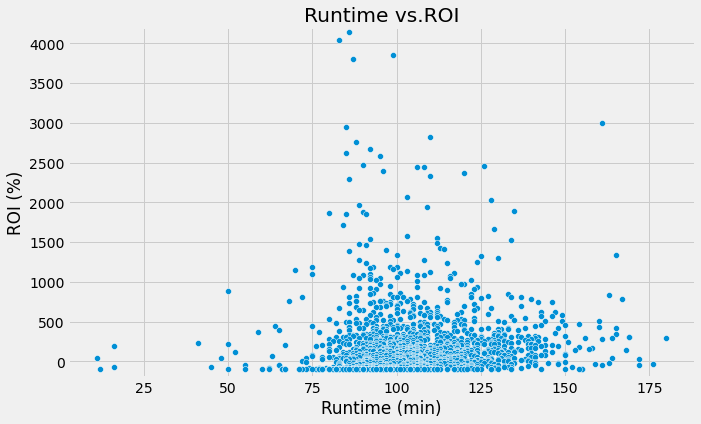

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x= tn_imdb_merge['runtime_minutes'], y= tn_imdb_merge['ROI'], data= tn_imdb_merge)
ax.set(ylim=(-200, 4200))


ax.set_title('Runtime vs.ROI')
plt.xlabel('Runtime (min)')
plt.ylabel('ROI (%)')
#proper labelling

plt.savefig('ROI_min_1.png')

#This scatter plot potentially shows an ROI peak roughly between 80 and 140 minutes, but due to the effect of
#outliers, and the fact that NO ROI can sit below -100,thus creating an intense density at -100, it is difficult to ascertain visually. 
#I will cull the highest ROI outliers and regraph in the cell below. 

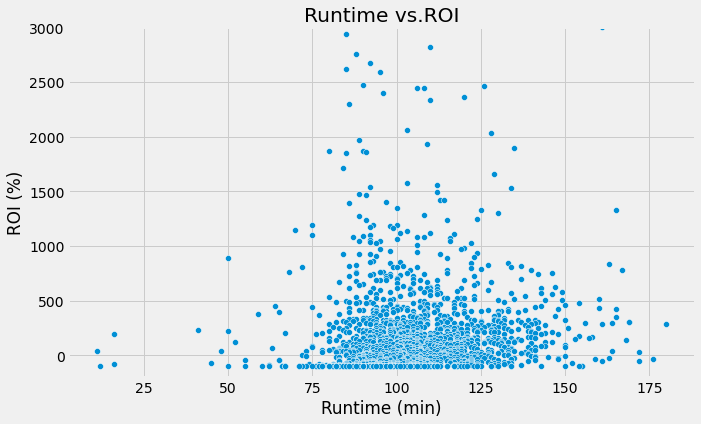

In [24]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x= tn_imdb_merge['runtime_minutes'], y= tn_imdb_merge['ROI'], data= tn_imdb_merge)
ax.set(ylim=(-200, 3000))

ax.set_title('Runtime vs.ROI')
plt.xlabel('Runtime (min)')
plt.ylabel('ROI (%)')
#proper labelling

plt.savefig('ROI_min_2.png')
#I will continue to cull the highest ROI outliers.

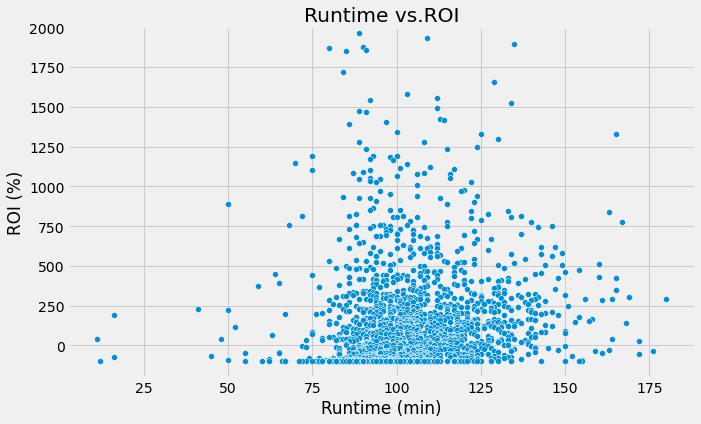

In [25]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x= tn_imdb_merge['runtime_minutes'], y= tn_imdb_merge['ROI'], data= tn_imdb_merge)
ax.set(ylim=(-200, 2000))

ax.set_title('Runtime vs.ROI')
plt.xlabel('Runtime (min)')
plt.ylabel('ROI (%)')
#proper labelling

plt.savefig('ROI_min_3.png')

#As I continued to cull the highest ROI outliers, it occurred to me that I could (and should) instead stratify, by
#culling out all but the outliers (and a few more) to see what that visualization demonstrates about the
#top-earning/blockbuster films.


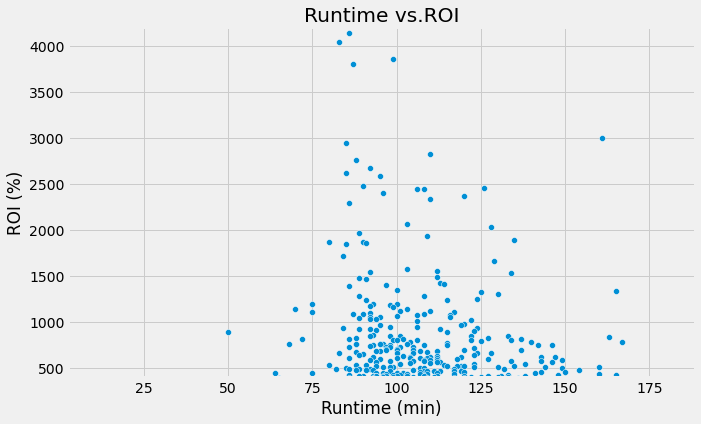

In [26]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x= tn_imdb_merge['runtime_minutes'], y= tn_imdb_merge['ROI'], data= tn_imdb_merge)
ax.set(ylim=(400, 4200))

ax.set_title('Runtime vs.ROI')
plt.xlabel('Runtime (min)')
plt.ylabel('ROI (%)')
#proper labelling

plt.savefig('ROI_min_4.png')

#Now I can begin to see a weak negative correlation between runtime and ROI. Perhaps more importantly, I can see
#that the top-earners/blockbusters (my definition here is ROI > 1000), sit within a band of roughly 75 to 135 min
#of runtime. (1hr15min to 2hr15min) I would thus recommend to Microsoft that their new production studio aim to
#produce films within roughly this range. A secondary recommendation here is that focusing on attaining highly 
#skilled/talented film editors is of significant importance, as they can help to maintain an appropriate plot arc,
#while also appeasing the audiences limited attention span.

## Finding 3:
    Genre vs. ROI:
    a) Of importance here is how many of these movies were inappropriately assigned a genre or far too many genres. This presents a problem in the data and to my surprise with IMDB's genre assignments, in my humble opinion. Once I researched the top 25 films, it became clear that almost all of the multi-genred films should simply be assigned  the genre of "Horror." While this may seem to overstep some bounds, I disagree. Most of the time, when a script is presented for purchase the reader is not thinking about 2-4 genres it fits, when it's clearly about violence and horror. The same concept applies to the audience. I would also argue that when someone wants to see a horror movie, they care little about any secondary or tertiary romantic plotline, especially when the romantic partners end up murdered at some point within the plot. In short, and rather simplistically, audiences choose horror flocks for the...HORROR. They want the fear-based adrenaline that only a true horror pic can produce. I thus reassigned some of these genre labels in order to better advise Microsoft Studios and  eliminate confusing, convoluted genre assignments.
    b) After reassigning inappropriate genre labels, I found that 18 of the top 25 earning films (based on ROI) since 2010 were Horror films. 2 of the top earners were Dramas. Of the remaining 6 films, there was one each of the following (mixed) genres: 'Drama,Romance', 'Action,Biography,Drama', 'Drama,Fantasy,Romance', 'Comedy,Drama', and 'Drama,Thriller.' Noticeably, the common denominator to all of these is...DRAMA. I would thus recommend to Microsoft studios that they focus heavily on acquiring spripts for Horrors and Dramas.

## Recommendation 3:
I would thus recommend to Microsoft studios that they focus heavily on acquiring spripts for Horrors and Dramas.
I would also advise to be wary of overly complex genre assignments, as these assignments (at least within the top 25 earners of this data set, were often innappropriate and misleading. This could heavily affect script acquisition.

In [27]:
#I need to continue cleaning the data at this point, as mentioned above.

tn_imdb_merge['genres'] = tn_imdb_merge['genres'].str.replace('Horror,Thriller', 'Horror') 
tn_imdb_merge['genres'] = tn_imdb_merge['genres'].str.replace('Drama,Horror,Thriller', 'Horror')
tn_imdb_merge['genres'] = tn_imdb_merge['genres'].str.replace('Horror,Mystery,Thriller', 'Horror')
tn_imdb_merge['genres'] = tn_imdb_merge['genres'].str.replace('Drama,Horror', 'Horror')
# I reassigned all three of these mixed genres as horror films. My logic was that the aspect of horror within a
#film is, by and far, the most attractive and unattractive aspect such films by fans and non-fans of horror.
# "Horror" within a film also overloads the viewers senses, via fear-based adrenaline, far more than simply 
#"Drama" or "Mystery." I also chose to eliminate "Thriller" from mixed genres because I consider it to be highly 
#synonymous with "Horror," but perhaps once again indicating less intense reactions from viewers.

tn_imdb_merge.at[5, 'genres'] = 'Horror'
#I hard-coded/reset this genre by hand from 'Comedy,Romance,Sport' to 'Horror' because the genre label was 
#completely wrong. According to Wikipedia, "Split is a 2016 American psychological horror-thriller film..."
# source: https://en.wikipedia.org/wiki/Split_(2016_American_film)

tn_imdb_merge.at[21, 'genres'] = 'Horror'
#I hard-coded/reset this genre by hand from 'Drama' to 'Horror' because the genre label was completely wrong. 
#According to Wikipedia, "Lights Out is a 2016 American supernatural horror film..."
# source: https://en.wikipedia.org/wiki/Lights_Out_(2016_film)

# "A Ghost Story" at index 29, despite being a mixed genre is accurately labelled, in my opinion, based upon the
#plot. source: https://en.wikipedia.org/wiki/A_Ghost_Story

tn_imdb_merge.at[30, 'genres'] = 'Horror'
#I hard-coded/reset this genre by hand from 'Horror,Romance,Thriller' to 'Horror' because the genre label was 
#completely wrong. According to Wikipedia, "Truth or Dare...is a 2018 American supernatural 
#horror film..." source: https://en.wikipedia.org/wiki/Truth_or_Dare_(2018_film)
#I also read the full plot description and agreed with Wikipedia's description.

tn_imdb_merge.at[36, 'genres'] = 'Horror'
#I hard-coded/reset this genre by hand from 'Action,Comedy,Horror' to 'Horror' because the genre label was 
#completely wrong. According to Wikipedia, "You're Next is a 2011 American slasher film..."
#horror film..." source: https://en.wikipedia.org/wiki/You%27re_Next
#I also read the full plot description and agreed with Wikipedia's description.



tn_imdb_merge_top = tn_imdb_merge.iloc[:26, :]

#tn_imdb_merge.groupby(by=['genres'])

print(tn_imdb_merge_top['genres'])
tn_imdb_merge.head(26)

#Of importance here is how many of these movies were inappropriately assigned a genre or far too many genres.
#This presents a problem in the data and to my surprise with IMDB's genre assignments, in my humble opinion.
#Once I researched the top 25 films, it became clear that almost all of the multi-genred films should simply be
#assigned the genre of "Horror." While this may seem to overstep some bounds, I disagree. Most of the time, when a 
#script is presented for purchase the reader is not thinking about 2-4 genres it fits, when it's clearly about 
#violence and horror. The same concept applies to the audience. I would also argue that when someone wants to see a horror
#movie, they care little about any secondary or tertiary romantic plotline, especially when the romantic partners
#end up murdered at some point within the plot. In short, and rather simplistically, audiences choose horror flocks
#for the...HORROR. I thus reassigned some of these genre labels in order to better advise Microsoft Studios and 
#eliminate confusing, convoluted genre assignments.

0                     Horror
1                     Horror
2                     Horror
3                     Horror
4                     Horror
5                     Horror
11                    Horror
12                     Drama
14                    Horror
15                    Horror
16                    Horror
17                    Horror
18    Action,Biography,Drama
20                    Horror
21                    Horror
26                    Horror
28                    Horror
29     Drama,Fantasy,Romance
30                    Horror
36                    Horror
37              Comedy,Drama
38             Drama,Romance
39                    Horror
40            Drama,Thriller
41                    Horror
42                     Drama
Name: genres, dtype: object


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,Release Year,Release Month,tconst,original_title,start_year,runtime_minutes,genres
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556.474000,2015,Jul,tt2309260,The Gallows,2015,81.0,Horror
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10075.949000,2012,Jan,tt1560985,The Devil Inside,2012,83.0,Horror
2,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,6558.059067,2011,Apr,tt1591095,Insidious,2010,103.0,Horror
3,14,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,6336.419800,2015,Apr,tt3713166,Unfriended,2014,83.0,Horror
4,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5817.067733,2010,Oct,tt1536044,Paranormal Activity 2,2010,91.0,Horror
5,50,"Jan 20, 2017",Split,5000000,138141585,278964806,5479.296120,2017,Jan,tt2660118,Split,2016,90.0,Horror
11,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5007.359020,2017,Feb,tt5052448,Get Out,2017,104.0,Horror
12,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4249.700800,2016,Oct,tt4975722,Moonlight,2016,111.0,Drama
14,18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,4141.172100,2012,May,tt1991245,Chernobyl Diaries,2012,86.0,Horror
15,51,"Oct 21, 2011",Paranormal Activity 3,5000000,104028807,207039844,4040.796880,2011,Oct,tt1778304,Paranormal Activity 3,2011,83.0,Horror


In [28]:
tn_imdb_merge_top['genres'].value_counts()

Horror                    19
Drama                      2
Drama,Romance              1
Action,Biography,Drama     1
Drama,Fantasy,Romance      1
Drama,Thriller             1
Comedy,Drama               1
Name: genres, dtype: int64

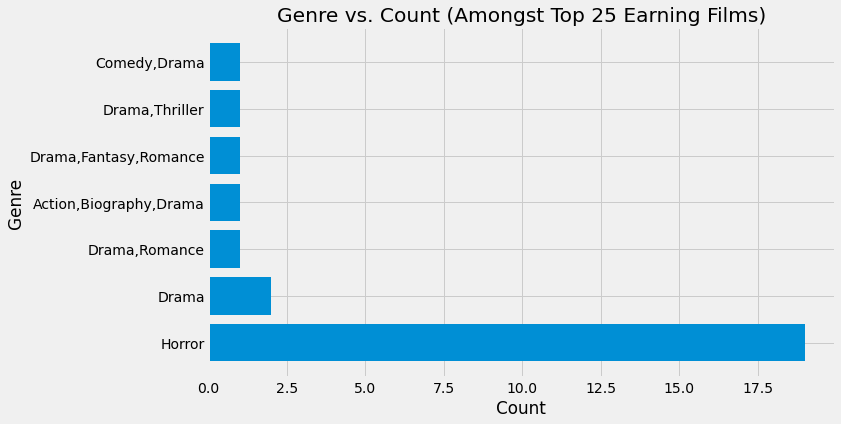

In [29]:
tn_imdb_merge_top['genres'].value_counts()

fig, ax = plt.subplots(figsize = (10,6))
ax = plt.barh(tn_imdb_merge_top['genres'].value_counts().index,tn_imdb_merge_top['genres'].value_counts())

plt.title('Genre vs. Count (Amongst Top 25 Earning Films)')
plt.ylabel('Genre')
plt.xlabel('Count')
#proper labelling

plt.savefig('ROI_mos.png')

#After reassigning inappropriate genre labels, I found that 18 of the top 25 earning films (based on ROI) since 
#2010 were Horror films. 2 of the top earners were Dramas. Of the remaining 6 films, there was one each of the
#following (mixed) genres: 'Drama,Romance', 'Action,Biography,Drama', 'Drama,Fantasy,Romance', 'Comedy,Drama', and
#'Drama,Thriller.' Noticeably, the common denominator to all of these is...DRAMA.
#I would thus recommend to Microsoft studios that they focus heavily on acquiring spripts for Horrors and Dramas.

# Thank for taking the time to read this notebook and my findings and recommendations.